# Marketing Analytics

## Getting Started
In this project, there will be evaluated the performance and predictive power of a model that has been trained and tested on data collected from peoperties listed on Airbnb in Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its rent expense. This model would prove to be invaluable for someone like a Airbnb host who could make use of such information on a daily basis.
The dataset for this project originates from the Airbnb public resourse. The data was collected in 2016 and each entry represents aggregated data about multiple features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:

In [1]:

# Import libraries necessary for this project
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt



#load dataset
data = pd.read_csv("/Users/baixuhui/Desktop/boston/data.csv")
price = data['price']
features = data.drop(['price','South End','is_other_type','is_shared_room',
                     'Real Bed','Cancellation_policy_SuperStrict','Cancellation_policy_moderate',
                     'Cancellation_policy_strict','is_Entire_home/apt','identity_varified_host', 'Beacon Hill',
                     'Charlestown', 'Fenway', 'North End', 'is_apartment', 'is_condominium','is_house',
                     'Futon','Pull-out Sofa', 'is_deposit','is_clean_fee','number_of_reviews',
                     'review_scores_rating','review_scores_accuracy','review_scores_communication'], axis=1)

#successful loading
print("Boston Airbnb dataset has {} data points with {} variables each.".format(*features.shape))

Boston Airbnb dataset has 2721 data points with 29 variables each.


## Data Exploration

Statistics for Boston housing dataset:

Minimum price: $11.0
Maximum price: $536.0
Mean price: $159.72
Median price $145.0
Standard deviation of price: $94.04


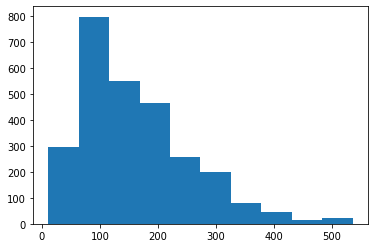

In [2]:
# Minimum price of the data
minimum_price = np.amin(price)

# Maximum price of the data
maximum_price = np.amax(price)

# Mean price of the data
mean_price = np.mean(price)

# Median price of the data
median_price = np.median(price)

# Standard deviation of price of the data
std_price = np.std(price)

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(price)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${:.2f}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of price: ${:.2f}".format(std_price))


## Scale Target Variable

(array([  1.,   3.,  32., 128., 408., 495., 567., 591., 399.,  97.]),
 array([2.39789527, 2.78651916, 3.17514305, 3.56376694, 3.95239083,
        4.34101472, 4.72963861, 5.11826249, 5.50688638, 5.89551027,
        6.28413416]),
 <a list of 10 Patch objects>)

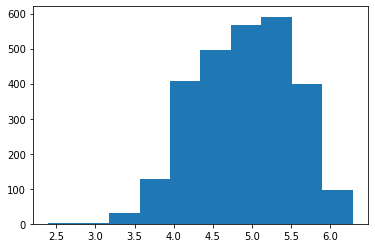

In [3]:
log_price = np.log(price)
plt.hist(log_price)

## Split Dataset into Training and Testing

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, log_price, random_state=0, train_size=0.8)


## Fit Linear Regression Model and Check Model Performance

In [18]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print (linreg.intercept_)
print (linreg.coef_)
print('\n')
print("The model score for training set is {:.3f}".format(linreg.score(X_train, y_train)))
print("The model score for testing set is {:.3f}".format(linreg.score(X_test, y_test)))

4.381756637219553
[ 0.06411176 -0.40739227  0.1157911  -0.4098037  -0.45626218  0.12794543
 -0.29206702 -0.34565645 -0.35975175 -0.20045271 -0.53806152 -0.27192993
 -0.08895505  0.17881462 -0.3904482   0.06447471  0.04056085  0.14481824
 -0.00960593 -0.49289937 -0.59926695  0.04695124 -0.06010465  0.07314624
 -0.02063494  0.04365403 -0.04662003 -0.08805306 -0.02674872]


The model score for training set is 0.699
The model score for testing set is 0.710


## Get Prediction and Calculate Performance Parameter

In [19]:
y_pred = linreg.predict(X_test)
from sklearn import metrics
print ("MSE:",metrics.mean_squared_error(y_test, y_pred))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 0.10104205663871936
RMSE: 0.3178711321254564


## Plot Actual and Predicted Price

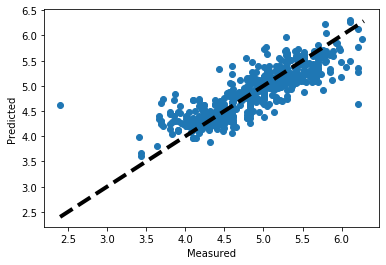

In [20]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([log_price.min(), log_price.max()], [log_price.min(), log_price.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Comparison: What if the price is not logarithmic

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train2, y_test2 = train_test_split(features, price, random_state=0, train_size=0.8)


In [22]:
from sklearn.linear_model import LinearRegression
linreg2 = LinearRegression()
linreg2.fit(X_train, y_train2)
print (linreg2.intercept_)
print (linreg2.coef_)
print('\n')
print("The model score for training set is {:.3f}".format(linreg2.score(X_train, y_train2)))
print("The model score for testing set is {:.3f}".format(linreg2.score(X_test, y_test2)))

75.89744988084394
[ 12.59354811 -52.03840422  30.67194939 -55.91713847 -64.69222429
  30.25876891 -44.40971025 -52.04277134 -46.14554933 -21.87542913
 -73.95507184 -33.90056382 -20.02164526  40.91587674 -48.04149433
   6.91902973  16.13889747  34.63489016   2.58715715 -25.85333739
 -55.79477837   9.05220466 -14.34012505   8.09908725  -1.68862184
   4.31115638  -6.32668957 -11.15459087  -4.96224575]


The model score for training set is 0.654
The model score for testing set is 0.653


In [23]:
y_pred2 = linreg2.predict(X_test)
from sklearn import metrics
print ("MSE:",metrics.mean_squared_error(y_test2, y_pred2))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

MSE: 2900.5124645323253
RMSE: 53.856405974891466


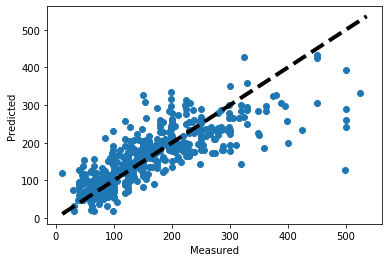

In [24]:
fig, ax = plt.subplots()
ax.scatter(y_test2, y_pred2)
ax.plot([price.min(), price.max()], [price.min(), price.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Use Ridge and Lasso to Optimize the model

The model score for training set is 0.699
The model score for testing set is 0.710


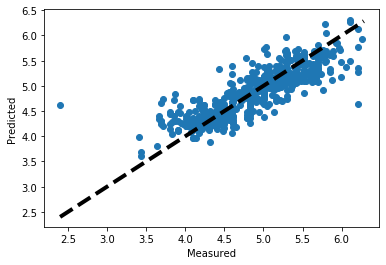

In [38]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, log_price, random_state=0, train_size=0.8)


ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print("The model score for training set is {:.3f}".format(ridge.score(X_train, y_train)))
print("The model score for testing set is {:.3f}".format(ridge.score(X_test, y_test)))

y_pred3 = ridge.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred3)
ax.plot([log_price.min(), log_price.max()], [log_price.min(), log_price.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Training set score: 0.44
Test set score: 0.43
Number of features used: 4


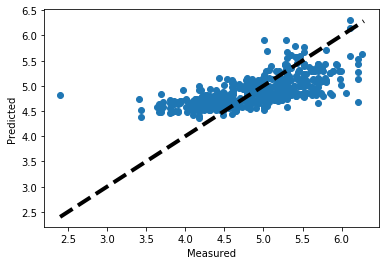

In [41]:
X_train, X_test, y_train, y_test = train_test_split(features, log_price, random_state=0, train_size=0.8)


lasso = Lasso(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

y_pred4 = lasso.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred4)
ax.plot([log_price.min(), log_price.max()], [log_price.min(), log_price.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Use cross-validation to test the linear model (not ridge nor lasso)

MSE: 0.11838
RMSE: 0.34407
Average prediction score for linear model is 0.61736


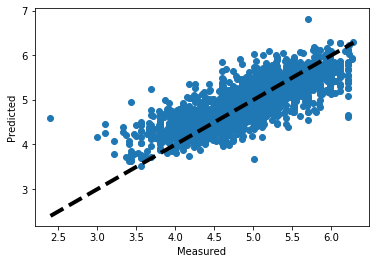

In [54]:
from sklearn.model_selection import cross_val_predict, cross_val_score

predicted = cross_val_predict(linreg, features, log_price, cv=10)
print ("MSE: {:.5f}".format(metrics.mean_squared_error(log_price, predicted)))
print ("RMSE: {:.5f}".format(np.sqrt(metrics.mean_squared_error(log_price, predicted))))

cv_scores = cross_val_score(linreg, features, log_price, cv=10)
print("Average prediction score for linear model is {:.5f}".format(cv_scores.mean()))

fig, ax = plt.subplots()
ax.scatter(log_price, predicted)
ax.plot([log_price.min(), log_price.max()], [log_price.min(), log_price.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()



## Use cross-validation to test the ridge model 

MSE: 0.11836
RMSE: 0.34403
Average prediction score for ridge model is 0.61743


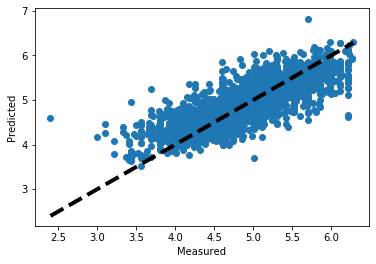

In [55]:
predicted2 = cross_val_predict(ridge, features, log_price, cv=10)
print ("MSE: {:.5f}".format(metrics.mean_squared_error(log_price, predicted2)))
print ("RMSE: {:.5f}".format(np.sqrt(metrics.mean_squared_error(log_price, predicted2))))


cv_scores2 = cross_val_score(ridge, features, log_price, cv=10)
print("Average prediction score for ridge model is {:.5f}".format(cv_scores2.mean()))


fig, ax = plt.subplots()
ax.scatter(log_price, predicted2)
ax.plot([log_price.min(), log_price.max()], [log_price.min(), log_price.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()



## Export the coefficient

In [69]:
head = features.head()
coef = linreg.coef_

result = dict(zip(head, coef))

for k, v in result.items():
    print('{key}: the price will change by {value:.2f}%'.format(key = k, value = v*100))

host_is_superhost: the price will change by 6.41%
Allston: the price will change by -40.74%
Back Bay: the price will change by 11.58%
Brighton: the price will change by -40.98%
Dorchester: the price will change by -45.63%
Downtown: the price will change by 12.79%
East Boston: the price will change by -29.21%
Jamaica Plain: the price will change by -34.57%
Mission Hill: the price will change by -35.98%
Other: the price will change by -20.05%
Roslindale: the price will change by -53.81%
Roxbury: the price will change by -27.19%
South Boston: the price will change by -8.90%
South Boston Waterfront: the price will change by 17.88%
is_Private_room: the price will change by -39.04%
accommodates: the price will change by 6.45%
bathrooms: the price will change by 4.06%
bedrooms: the price will change by 14.48%
beds: the price will change by -0.96%
Airbed: the price will change by -49.29%
Couch: the price will change by -59.93%
guests_included: the price will change by 4.70%
is_extra_people: th

## The basic price without satisfying any criteria

In [74]:
import math


intercept = linreg.intercept_
basic_price = math.exp(intercept)
print("The basic price is: {:.3f}".format(avg_price))

The basic price is: 79.978


### Through above analysis, we found that some variables has strong ability to explain the varience of price on Airbnb. The location variables play the dominant roles in determing price: prices in some areas are largely higher those in other areas. And the house type, number of bed&bathroom, reviews also have effect on the price. The overall explanatory power of our linear model on test dataset is 71%. By referring to this model, Airbnb hosts can optimize their pricing strategy and win the competition over other hosts within the area. And guests can also see wether the Airbnb rooms are overpriced or not. 
